<a href="https://colab.research.google.com/github/anonymous0905/Cancer-Prediction-using-genome-data/blob/main/v2.0/Copy_of_icmr_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Connect to Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Import Packages***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## ***Importing Dataset using Pandas***

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/data_icmr.csv')
dataset

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Importing Labels using Pandas***

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Datasets/labels.csv')
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


## ***Renaming Column Name in the Dataset***

In [ ]:
dataset.rename(columns = {'Unnamed: 0':'Cancer Type'}, inplace = True)
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Replacing Sample Labels with Cancer Type***

In [ ]:
for i in range (0,801):
  #dataset.iat[i,0] = labels.iat[i,1]
  dataset['Cancer Type'] = dataset['Cancer Type'].replace(dataset.iat[i,0], labels.iat[i,1])
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


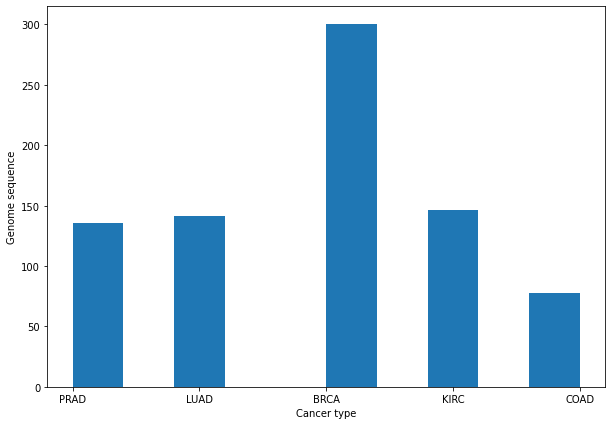

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(dataset['Cancer Type'])
plt.xlabel('Cancer type')
plt.ylabel('Genome sequence')
plt.show()


## ***Checking for NaN Values***

In [ ]:
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    print(col)
# No NaN Values found

## ***Data Description***

In [ ]:
dataset.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [ ]:
heatmap_data = pd.pivot_table(dataset, index=['Cancer Type'])
heatmap_data

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Cancer Type,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


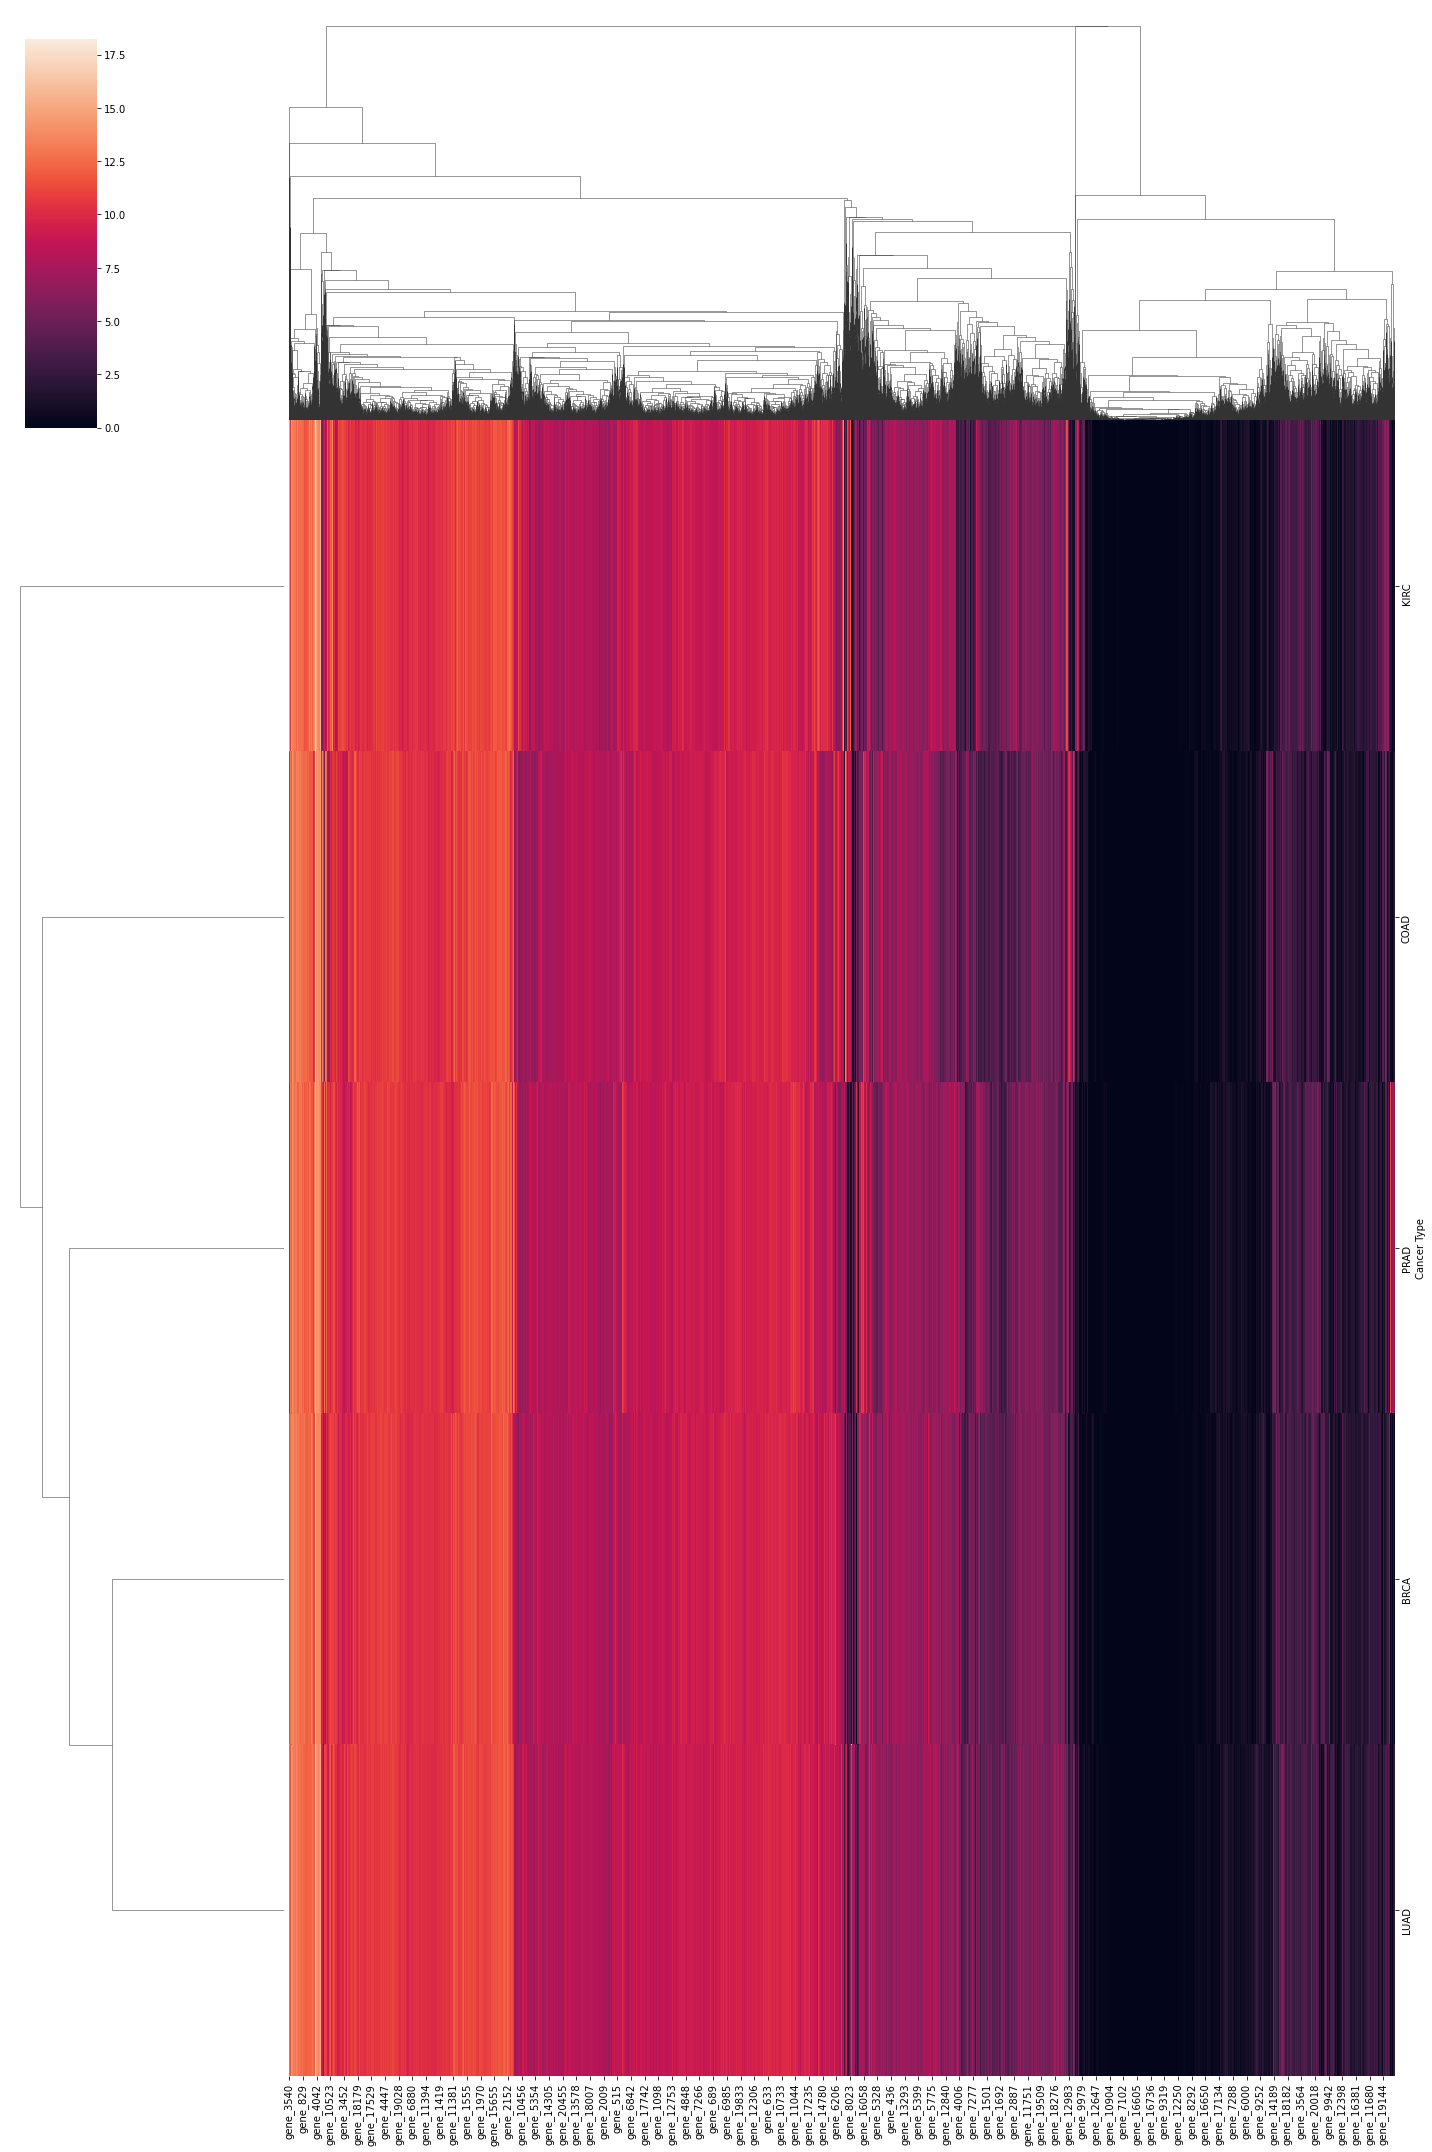

In [ ]:
sns.clustermap(heatmap_data, figsize=(20,30))

In [ ]:
lst1 = []
for i in range (0,20531):
  lst1.append(i)
hdr = list(dataset.columns)
del hdr[0]
lst2 = dataset.loc[0]
lst2 = list(lst2)
del lst2[0]




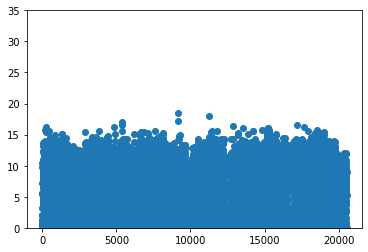

In [ ]:
plt.scatter(lst1, lst2)
plt.ylim(0,35)
plt.show()

## ***Encoding Categorical Data using Label Transformer***

In [ ]:
dataset['Cancer Type'].unique()
le = preprocessing.LabelEncoder()
le.fit(dataset['Cancer Type'])
print(le.classes_)
encoded_cancer_type = le.transform(dataset['Cancer Type'])
for i in range (0,801):
  #dataset.iat[i,0] = labels.iat[i,1]
  dataset['Cancer Type'] = dataset['Cancer Type'].replace(dataset.iat[i,0], encoded_cancer_type[i])
dataset

['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,4,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,3,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,4,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,4,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,3,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,1,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,4,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
col_header = list(dataset.columns)
del col_header[0]
dataset[col_header] = sc.fit_transform(dataset[col_header])

In [ ]:
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,4,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,3,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,4,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,4,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,0,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,-0.194799,-0.954328,-0.354155,0.983356,0.380054,0.0,-0.578502,-0.005819,-0.125376,...,0.256806,0.584642,-0.135605,-0.152573,-0.238559,0.431432,-0.589804,0.890943,1.587933,-0.261901
797,3,-0.194799,0.776655,1.275624,-0.588497,0.480533,0.0,-0.076907,-0.983088,-0.125376,...,0.637193,1.422436,-0.612944,0.717105,-1.270672,-0.162408,0.279202,-1.499107,1.993137,-0.261901
798,1,-0.194799,0.198881,0.574816,2.292529,-0.611452,0.0,0.118352,2.578699,-0.125376,...,-0.237537,-0.257444,1.132504,-0.528281,-0.733465,0.654847,0.906442,-0.220082,-0.410467,1.348558
799,4,-0.194799,-0.350453,-0.288632,0.934054,0.342783,0.0,1.632398,-0.983088,-0.125376,...,-0.149258,-0.266264,2.502171,-0.042767,-0.216665,-0.811922,0.310652,1.437193,0.091951,-0.261901



## ***PCA***

In [ ]:
dataset_pca = dataset.drop(['Cancer Type'], axis=1)
dataset_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


In [ ]:
x_pca = dataset_pca.values
x_pca

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [ ]:
X_pca_with_2 = pca_with_2.fit_transform(x_pca)
X_pca_with_2.shape

(801, 2)

In [ ]:
X_pca_with_2

array([[-57.44698724,  95.41098077],
       [-16.91943009,   0.73247028],
       [-70.34521736, -19.30332663],
       ...,
       [ -4.13308975,  15.69001374],
       [-30.81475746,  33.52642259],
       [-22.34455721,   4.05235642]])

In [ ]:
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

df_pca['Cancer Type'] = dataset['Cancer Type']
ml_x = df_pca.iloc[:,:-1].values
ml_y = df_pca.iloc[:,-1].values

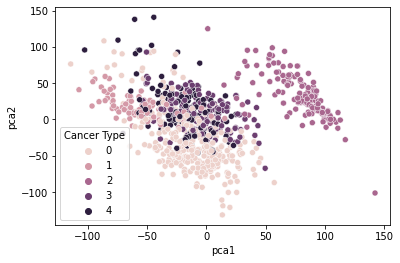

In [ ]:
import seaborn as sns
sns.scatterplot(x='pca1',y='pca2', hue = 'Cancer Type',data=df_pca)

In [ ]:
pca_with_995=PCA(.995)
X_pca_with_995 = pca_with_995.fit_transform(x_pca)
X_pca_with_995.shape
X_pca_with_995

array([[-5.74469869e+01,  9.54109807e+01,  7.43015433e+01, ...,
        -3.56477632e-01, -8.51167526e-01, -4.72912001e-01],
       [-1.69194301e+01,  7.32470333e-01, -6.40728996e+01, ...,
        -3.53561492e-01,  5.20652196e-01, -3.38981908e-02],
       [-7.03452179e+01, -1.93033266e+01,  2.04882405e+01, ...,
        -2.25456230e-01,  1.87995725e-01, -5.08107596e-02],
       ...,
       [-4.13308968e+00,  1.56900139e+01, -2.26444535e+01, ...,
         6.10203646e-02,  1.44891459e-01, -6.82958741e-02],
       [-3.08147575e+01,  3.35264225e+01,  7.05656359e+01, ...,
         6.21979767e-01, -1.96681583e-01, -5.90042742e-01],
       [-2.23445567e+01,  4.05235632e+00,  3.23278757e+01, ...,
        -7.24486355e-01,  3.07244329e-01, -6.50144576e-01]])

In [ ]:
df_pca_995 = pd.DataFrame(X_pca_with_995)
df_pca_995['Cancer Type']=dataset['Cancer Type']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,750,751,752,753,754,755,756,757,758,Cancer Type
0,-57.446987,95.410981,74.301543,-12.166781,7.981831,36.157573,-7.668542,19.951444,0.142216,3.035240,...,-0.092368,0.910286,0.570970,-0.143617,-0.295019,-0.972512,-0.356478,-0.851168,-0.472912,4
1,-16.919430,0.732470,-64.072900,-2.095308,-25.426430,27.784178,-16.132765,-17.031383,-22.023874,-27.923308,...,-0.956327,0.037139,-0.195932,-0.060466,-0.299392,0.388111,-0.353561,0.520652,-0.033898,3
2,-70.345218,-19.303327,20.488240,48.102893,24.437757,17.462510,20.706772,-47.626817,-28.647648,-12.784676,...,-0.791741,0.046303,-0.620765,-0.223858,0.206672,0.261850,-0.225456,0.187996,-0.050811,4
3,-49.161591,-9.227586,61.243770,37.805744,1.038889,23.240002,-4.801039,-21.554809,-15.375067,-12.881511,...,-1.675223,0.560625,0.483862,0.409201,-0.052218,1.014806,-0.008708,-0.126512,-0.273687,4
4,-18.132534,-51.327797,16.598116,-17.699201,26.389130,-1.551573,-6.266101,12.336677,-4.233837,28.804476,...,-0.957888,0.920014,1.547086,-1.349829,-0.852537,0.885260,0.276516,1.715377,1.265111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-12.417385,-42.321573,28.109566,-31.200320,38.814556,2.762444,-15.524261,10.618692,8.528240,27.573714,...,2.398479,-3.626716,-0.984676,5.311234,-0.627179,0.331528,0.059428,1.152223,-0.675995,0
797,-29.415554,28.526281,-15.956631,-11.635178,-37.071404,-16.239422,-17.341039,-35.107458,-26.870257,31.147205,...,0.474941,-0.180758,0.051256,0.322909,0.035707,0.310878,-0.408450,-0.005934,0.017343,3
798,-4.133090,15.690014,-22.644453,-11.982424,-57.835783,-39.652668,47.718063,24.221214,22.709097,-32.888886,...,0.137200,-0.100395,0.038435,0.305796,0.249271,-0.394561,0.061020,0.144891,-0.068296,1
799,-30.814757,33.526423,70.565636,16.643656,-16.579983,-4.318571,20.482607,-9.552721,3.680009,-7.948784,...,-0.044610,0.206886,-0.805976,-0.235274,-0.720099,0.560840,0.621980,-0.196682,-0.590043,4


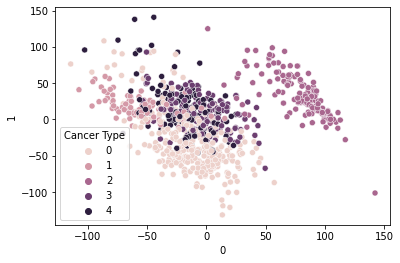

In [ ]:
sns.scatterplot(x=0,y=1,hue = 'Cancer Type', data=df_pca_995)

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_2)
clusters.labels_

array([4, 3, 2, 2, 0, 3, 1, 3, 0, 2, 3, 1, 3, 4, 0, 0, 3, 1, 1, 2, 0, 3,
       3, 2, 1, 3, 2, 0, 3, 0, 0, 0, 1, 4, 2, 0, 1, 3, 3, 4, 1, 2, 3, 1,
       1, 0, 4, 2, 0, 3, 0, 2, 0, 3, 2, 2, 0, 2, 1, 3, 3, 3, 0, 3, 2, 2,
       3, 2, 1, 2, 1, 3, 2, 3, 0, 2, 0, 4, 3, 2, 0, 3, 0, 0, 4, 3, 0, 2,
       1, 2, 2, 2, 0, 4, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 1, 2, 2, 2, 0,
       4, 0, 3, 3, 0, 1, 1, 1, 0, 0, 3, 1, 3, 2, 3, 3, 2, 0, 1, 2, 2, 2,
       4, 3, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 3, 2, 4, 0, 3, 2, 3, 3, 0, 0,
       3, 3, 0, 3, 2, 3, 4, 3, 1, 3, 3, 3, 2, 1, 3, 0, 1, 3, 0, 2, 0, 2,
       3, 3, 0, 1, 2, 1, 0, 3, 2, 3, 3, 3, 0, 3, 3, 1, 4, 0, 3, 0, 4, 0,
       2, 3, 0, 1, 1, 1, 1, 0, 4, 2, 3, 3, 3, 0, 3, 2, 3, 0, 0, 0, 3, 3,
       1, 3, 1, 1, 3, 0, 1, 2, 0, 3, 4, 0, 2, 4, 1, 3, 1, 2, 3, 1, 1, 0,
       2, 3, 3, 3, 1, 0, 0, 2, 0, 2, 3, 0, 3, 1, 4, 3, 3, 0, 3, 2, 0, 2,
       2, 2, 0, 2, 0, 1, 1, 0, 2, 4, 1, 3, 0, 0, 1, 0, 0, 0, 4, 3, 3, 0,
       0, 0, 1, 1, 1, 1, 4, 0, 0, 1, 0, 0, 3, 3, 3,

In [ ]:
pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
pca_with_2_data_frame

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732470
2,-70.345217,-19.303327
3,-49.161591,-9.227586
4,-18.132533,-51.327797
...,...,...
796,-12.417384,-42.321574
797,-29.415553,28.526281
798,-4.133090,15.690014
799,-30.814757,33.526423


In [ ]:
pca_with_2_data_frame['Cls_label'] = clusters.labels_
pca_with_2_data_frame['given_cancer_type'] = labels.Class.values
pca_with_2_data_frame

,pca1,pca2,Cls_label,given_cancer_type
0,-57.446987,95.410981,4,PRAD
1,-16.919430,0.732470,3,LUAD
2,-70.345217,-19.303327,2,PRAD
3,-49.161591,-9.227586,2,PRAD
4,-18.132533,-51.327797,0,BRCA
...,...,...,...,...
796,-12.417384,-42.321574,0,BRCA
797,-29.415553,28.526281,2,LUAD
798,-4.133090,15.690014,3,COAD
799,-30.814757,33.526423,2,PRAD


In [ ]:
brca = pca_with_2_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca.Cls_label.value_counts()

0    202
3     44
2     35
4     19
Name: Cls_label, dtype: int64

In [ ]:
luad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad.Cls_label.value_counts()

3    99
2    23
0    13
4     5
1     1
Name: Cls_label, dtype: int64

In [ ]:
coad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('COAD')
coad.Cls_label.value_counts()

2    61
4     9
3     8
Name: Cls_label, dtype: int64

In [ ]:
prad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad.Cls_label.value_counts()

3    60
2    46
0    17
4    13
Name: Cls_label, dtype: int64

In [ ]:
kirc =  pca_with_2_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc.Cls_label.value_counts()

1    138
3      7
4      1
Name: Cls_label, dtype: int64

# Test-Train split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.3,random_state=1)

# Decision Tree

In [ ]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)



0.6846473029045643

# SVC kernel=linear

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6721991701244814


# SVC kernel=rbf

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_clf = SVC(probability=True, kernel='rbf')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6846473029045643


# Random Forest

In [ ]:
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.6804979253112033

# K Neighbor Classfication

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.7053941908713693